In [1]:
#Sairaj's Matrix
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
raw_mail_data=pd.read_csv('/content/mail_data.csv')

In [4]:
raw_mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
mail_data=raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [6]:
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Message').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Message'].value_counts()
    for x_label, grp in _df_2.groupby('Category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Category')
_ = plt.ylabel('Message')

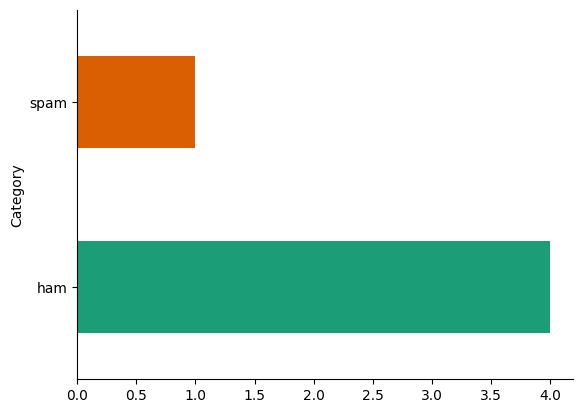

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [9]:
mail_data.shape

(5572, 2)

In [11]:
mail_data.loc[mail_data['Category']=='spam','Category',]=0
mail_data.loc[mail_data['Category']=='ham','Category',]=1

In [12]:
X=mail_data['Message']

Y=mail_data['Category']

In [14]:
print(X)
print(Y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object
0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=3)

In [16]:
print(X.shape,X_train.shape,X_test.shape)


(5572,) (4457,) (1115,)


In [17]:
feature_extraction=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)
X_train_features=feature_extraction.fit_transform(X_train)
X_test_features=feature_extraction.transform(X_test)
Y_train=Y_train.astype('int')
Y_test=Y_test.astype('int')

In [18]:
print(X_train)

3501    Dorothy@kiefer.com (Bank of Granite issues Str...
617     He like not v shock leh. Cos telling shuhui is...
475     Nice line said by a broken heart- Plz don't cu...
5535    I know you are thinkin malaria. But relax, chi...
4747           Orh i tot u say she now still dun believe.
                              ...                        
4402         Many times we lose our best ones bcoz we are
3615                                         Ok c ü then.
4763                      Me too! Have a lovely night xxx
4339                          Yes when is the appt again?
1827    Dude. What's up. How Teresa. Hope you have bee...
Name: Message, Length: 4457, dtype: object


In [19]:
print(X_train_features)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 34678 stored elements and shape (4457, 7493)>
  Coords	Values
  (0, 2353)	0.28101404009316056
  (0, 3806)	0.28101404009316056
  (0, 1857)	0.17073786814794129
  (0, 1193)	0.22908400928709988
  (0, 3113)	0.28101404009316056
  (0, 3627)	0.25144905621529934
  (0, 6330)	0.24059246244542992
  (0, 1540)	0.17407870571957915
  (0, 2644)	0.28101404009316056
  (0, 5029)	0.17467075796896542
  (0, 4306)	0.26793132631329497
  (0, 421)	0.25144905621529934
  (0, 4557)	0.28101404009316056
  (0, 6468)	0.26793132631329497
  (0, 1657)	0.28101404009316056
  (0, 0)	0.23628394623676158
  (1, 3982)	0.4167622750027118
  (1, 5911)	0.2761926296686631
  (1, 3941)	0.20702870014136815
  (1, 1969)	0.1749293187718031
  (1, 6553)	0.4722950153731612
  (1, 5947)	0.24356944504246256
  (1, 3948)	0.2761926296686631
  (1, 2113)	0.1985161464110967
  (1, 3828)	0.13684128003316173
  :	:
  (4456, 5091)	0.1743505991070133
  (4456, 7339)	0.13767285254208542
  (4456, 24

In [21]:
model=LogisticRegression()

In [22]:
model.fit(X_train_features,Y_train)

LogisticRegression()

In [23]:
prediction_on_training_data=model.predict(X_train_features)
accuracy_on_training_data=accuracy_score(Y_train,prediction_on_training_data)

In [24]:
print("Accuracy on training data: ", accuracy_on_training_data)

Accuracy on training data:  0.9667938074938299


In [25]:
prediction_on_test_data=model.predict(X_test_features)
accuracy_on_test_data=accuracy_score(Y_test,prediction_on_test_data)

In [26]:
print('Accuracy on test data: ',accuracy_on_test_data)

Accuracy on test data:  0.9713004484304932


In [28]:
input_mail=["Update_Now - Xmas Offer! Latest Motorola, SonyEricsson & Nokia & FREE Bluetooth! Double Mins & 1000 Txt on Orange. Call MobileUpd8 on 08000839402 or call2optout/F4Q="
]


input_mail_features=feature_extraction.transform(input_mail)
class_labels=model.classes_
print(class_labels)

prediction=model.predict(input_mail_features)
print(prediction)

if prediction[0]==0:
  print("This one's a spam")
else:
  print('Well,This is not a spam mail')

[0 1]
[0]
This one's a spam


In [29]:
input_mail=["Mm that time you dont like fun"]

input_mail_features=feature_extraction.transform(input_mail)
prediction=model.predict(input_mail_features)
print(prediction)

if prediction[0]==0:
  print("This one's a spam")
else:
  print("Well, This is ain't a spam!")

[1]
Well, This is ain't a spam!


In [30]:
def predict_spam(email):
    input_mail = [email]
    input_data_features = feature_extraction.transform(input_mail)
    prediction = model.predict(input_data_features)

    if prediction[0] == 0:
        return "Spam"
    else:
        return "Not a Spam"

Now you can use the `predict_spam` function to classify new email messages. Let's try with a couple of examples:

In [33]:
spam_email = "Congratulations! You've won a free PS5. Click here to claim your prize."
print(f"Email: {spam_email}")
print(f"Prediction: {predict_spam(spam_email)}")

Email: Congratulations! You've won a free PS5. Click here to claim your prize.
Prediction: Spam


In [34]:
ham_email = "Hey Sairaj, just wanted to remind you about our meeting tomorrow at 10 AM."
print(f"Email: {ham_email}")
print(f"Prediction: {predict_spam(ham_email)}")

Email: Hey Sairaj, just wanted to remind you about our meeting tomorrow at 10 AM.
Prediction: Not Spam


In [36]:
def summarize_mail_data(df):
  category_counts = df['Category'].value_counts().reset_index()
  category_counts.columns = ['Category', 'Count']
  category_counts['Category'] = category_counts['Category'].map({1: ' Not spam', 0: 'spam'})
  return category_counts

summary_table = summarize_mail_data(mail_data)
display(summary_table)

,Category,Count
0,Not spam,4825
1,spam,747


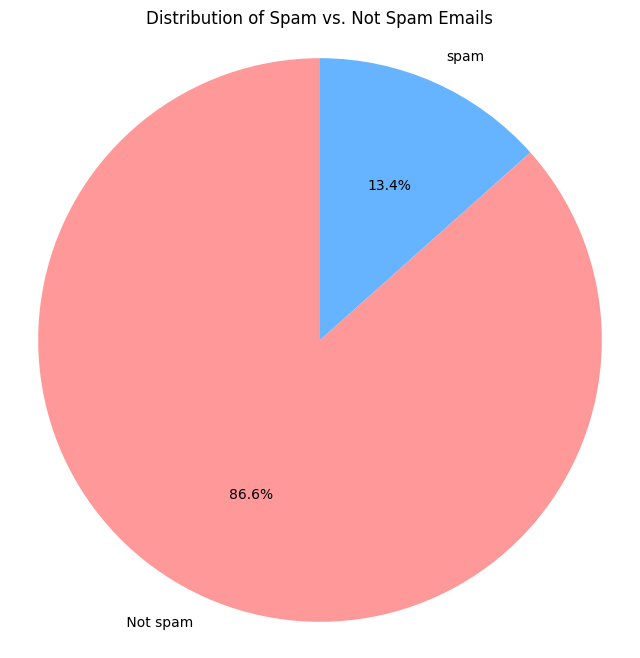

In [37]:
import matplotlib.pyplot as plt

labels = summary_table['Category']
sizes = summary_table['Count']
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Spam vs. Not Spam Emails')
plt.axis('equal')
plt.show()

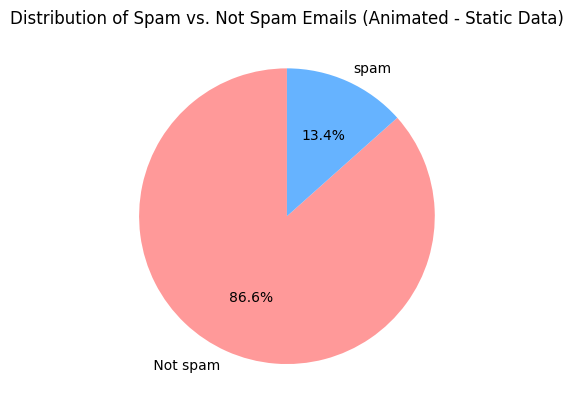

In [39]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd

labels = summary_table['Category']
sizes = summary_table['Count']
colors = ['#ff9999','#66b3ff']

fig, ax = plt.subplots()
ax.axis('equal')

wedges, texts, autotexts = ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

def update(frame):

    return wedges + list(texts) + list(autotexts)


ani = animation.FuncAnimation(fig, update, frames=range(1), blit=True)

plt.title('Distribution of Spam vs. Not Spam Emails (Animated - Static Data)')
plt.show()